In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
rank = 2**2 - 1
table = np.loadtxt('sim.txt')
table = table.astype(np.int)
num_samples = table.shape[0]
num_features = table.shape[1]
gradient = np.linspace(0, 10, num_samples)


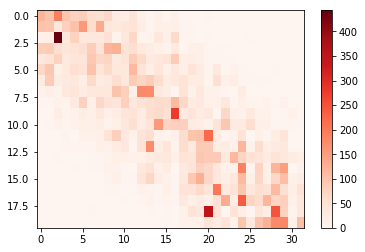

In [3]:
plt.imshow(table, aspect='auto', interpolation='nearest', cmap='Reds')
plt.colorbar()

In [4]:
from gneiss.cluster import rank_linkage
from gneiss.balances import balance_basis

x = pd.Series(np.arange(num_features))
x.index = x.index.astype(np.str)
tree = rank_linkage(x)
basis, _ = balance_basis(tree)

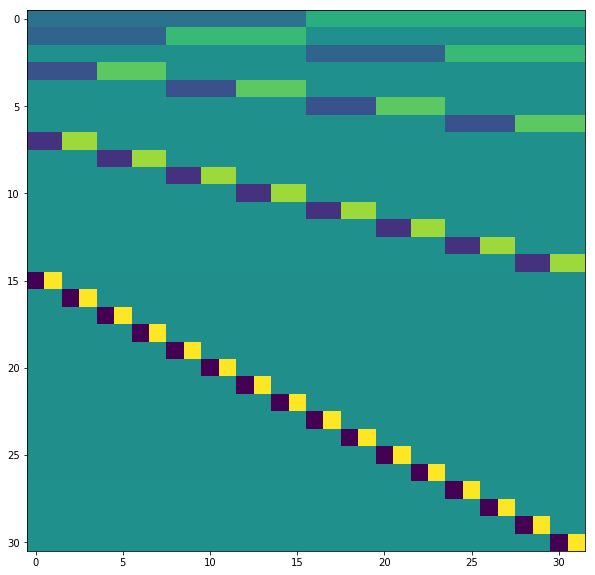

In [5]:
from skbio.stats.composition import clr
fig = plt.figure(figsize=(10, 10))
plt.imshow(clr(basis))

In [6]:
# look at full partition
psi = clr(basis)

In [7]:
import pystan

#----------------------------------------------
# Create the Stan model
#  this is done by defining a string of Stan code.

fit_code = open('model_pca.stan', 'r').read()

In [8]:
# perform the fit
fit_data = {'N': len(gradient), 'D': table.shape[1], 'r':rank, 
            'psi': np.linalg.pinv(psi).T, 'g': gradient, 'x': table}
fit = pystan.stan(model_code=fit_code, data=fit_data, iter=5000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_40905810a6fcc164faa6251a7c71fadf NOW.


KeyboardInterrupt: 

In [ ]:
traces = fit.extract()

In [ ]:
traces['beta0'].shape

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(traces['beta0'][:, :3])

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(traces['beta1'][:, :3])